# <center> Практична робота 02 </center> <center> Математичні основи машинного навчання </center>

___Завдання:___ 
1. Основи роботи з бібліотекою NumPy (2 бали)
2. Обробка зображень засобами бібліотеки NumPy (3 бали)
3. Перевірка гіпотез за допомогою пакетів scipy.stats та statsmodels (1 бал)


### <p style='text-align: right;'> Виконав студент групи <ins>1П-20</ins> </p><p style='text-align: right;'> <ins>Анголюк Станіслав Дмитрович</ins> </p><p style='text-align: right;'> <ins>Номер у списку групи: 1</ins> </p>

## 1. Основи роботи з бібліотекою NumPy (2 бали)
### 1.1. Імпортуйте пакет numpy та виведіть його версію і конфігурацію (метод show_config())

In [1]:
import numpy as np
print(np.__version__)
np.show_config()

1.22.2
openblas64__info:
    library_dirs = ['D:\\a\\1\\s\\numpy\\build\\openblas64__info']
    libraries = ['openblas64__info']
    language = f77
    define_macros = [('HAVE_CBLAS', None), ('BLAS_SYMBOL_SUFFIX', '64_'), ('HAVE_BLAS_ILP64', None)]
blas_ilp64_opt_info:
    library_dirs = ['D:\\a\\1\\s\\numpy\\build\\openblas64__info']
    libraries = ['openblas64__info']
    language = f77
    define_macros = [('HAVE_CBLAS', None), ('BLAS_SYMBOL_SUFFIX', '64_'), ('HAVE_BLAS_ILP64', None)]
openblas64__lapack_info:
    library_dirs = ['D:\\a\\1\\s\\numpy\\build\\openblas64__lapack_info']
    libraries = ['openblas64__lapack_info']
    language = f77
    define_macros = [('HAVE_CBLAS', None), ('BLAS_SYMBOL_SUFFIX', '64_'), ('HAVE_BLAS_ILP64', None), ('HAVE_LAPACKE', None)]
lapack_ilp64_opt_info:
    library_dirs = ['D:\\a\\1\\s\\numpy\\build\\openblas64__lapack_info']
    libraries = ['openblas64__lapack_info']
    language = f77
    define_macros = [('HAVE_CBLAS', None), ('BLAS_SYMBOL_SU

### 1.2. Створіть матрицю 3х3 зі значеннями з діапазону від 0 до 8

In [2]:
matrix = np.random.randint(9, size=(3, 3))
# не зрозумів чи рандомні від 0 до 8, чи послідовно просто
# якщо послідовно, то np.arange(9).reshape(3,3)
matrix

array([[0, 3, 0],
       [2, 2, 3],
       [0, 3, 2]])

### 1.3. Створіть матрицю 8х8 та заповніть її нулями та одиницями в шаховому порядку

In [3]:
matrix = np.zeros((8,8), dtype='int')
for i in range(8):
    for j in range(8):
        if ((i+j) % 2 == 1):
            matrix[i][j] = 1
matrix

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])

### 1.4. Для заданого одновимірного масиву зробіть всі значення його елементів від 3 до 8 від'ємними

In [4]:
array = np.arange(30)
# for num in range(len(array)):
#     if array[num] <= 8 and array[num] >= 3:
#            array[num] *= -1
array[(3 <= array) & (array <= 8)] *= -1

array

array([ 0,  1,  2, -3, -4, -5, -6, -7, -8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

### 1.5. Обчисліть результат виразу -A*(A+B)/(4*B) без копіювання даних. Для цього розгляньте операції np.add(), np.divide(), np.negative() та np.multiply()

In [5]:
a = 5
b = 10
result = np.divide(np.multiply(np.negative(a), np.add(a, b)), np.multiply(4, b))
result

-1.875

### 1.6. Створіть вектор на 10 значень та відсортуйте його. 

In [6]:
array = np.random.randint(11, size=(1, 10))
array.sort()
array

array([[ 0,  1,  3,  3,  4,  6,  7,  9,  9, 10]])

### 1.7. Сформуйте [матрицю Коші](https://uk.wikipedia.org/wiki/%D0%9C%D0%B0%D1%82%D1%80%D0%B8%D1%86%D1%8F_%D0%9A%D0%BE%D1%88%D1%96) з 2 векторів

In [7]:
X = np.array([6, 8, 9, 10, 7])
Y = np.array([1, 2, 3, 4, 5])
C = 1.0 / np.subtract.outer(X, Y)
print(C)

[[0.2        0.25       0.33333333 0.5        1.        ]
 [0.14285714 0.16666667 0.2        0.25       0.33333333]
 [0.125      0.14285714 0.16666667 0.2        0.25      ]
 [0.11111111 0.125      0.14285714 0.16666667 0.2       ]
 [0.16666667 0.2        0.25       0.33333333 0.5       ]]


### 1.8. Знайдіть значення, яке найчастіше зустрічається в масиві Z тільки засобами NumPy. Розгляньте np.bincount() та для перевірки використайте метод mode() з пакету scipy.stats

In [8]:
from scipy import stats

array = np.random.randint(10, size=(1, 30))
# А вправно це я придумав

bin = np.bincount(array[0])
stats.mode(bin)

ModeResult(mode=array([3], dtype=int64), count=array([5]))

# 

## 2. Обробка зображень засобами бібліотеки NumPy (3 бали)
### 2.1. Опануйте попіксельне створення растрових зображень, програмно відобразивши на екрані бісерні рисунки відповідно до свого варіанту. Колір пікселів підбираєте вручну, за допомогою графічного редактора або спеціальних сервісів, як imagecolorpicker.com:
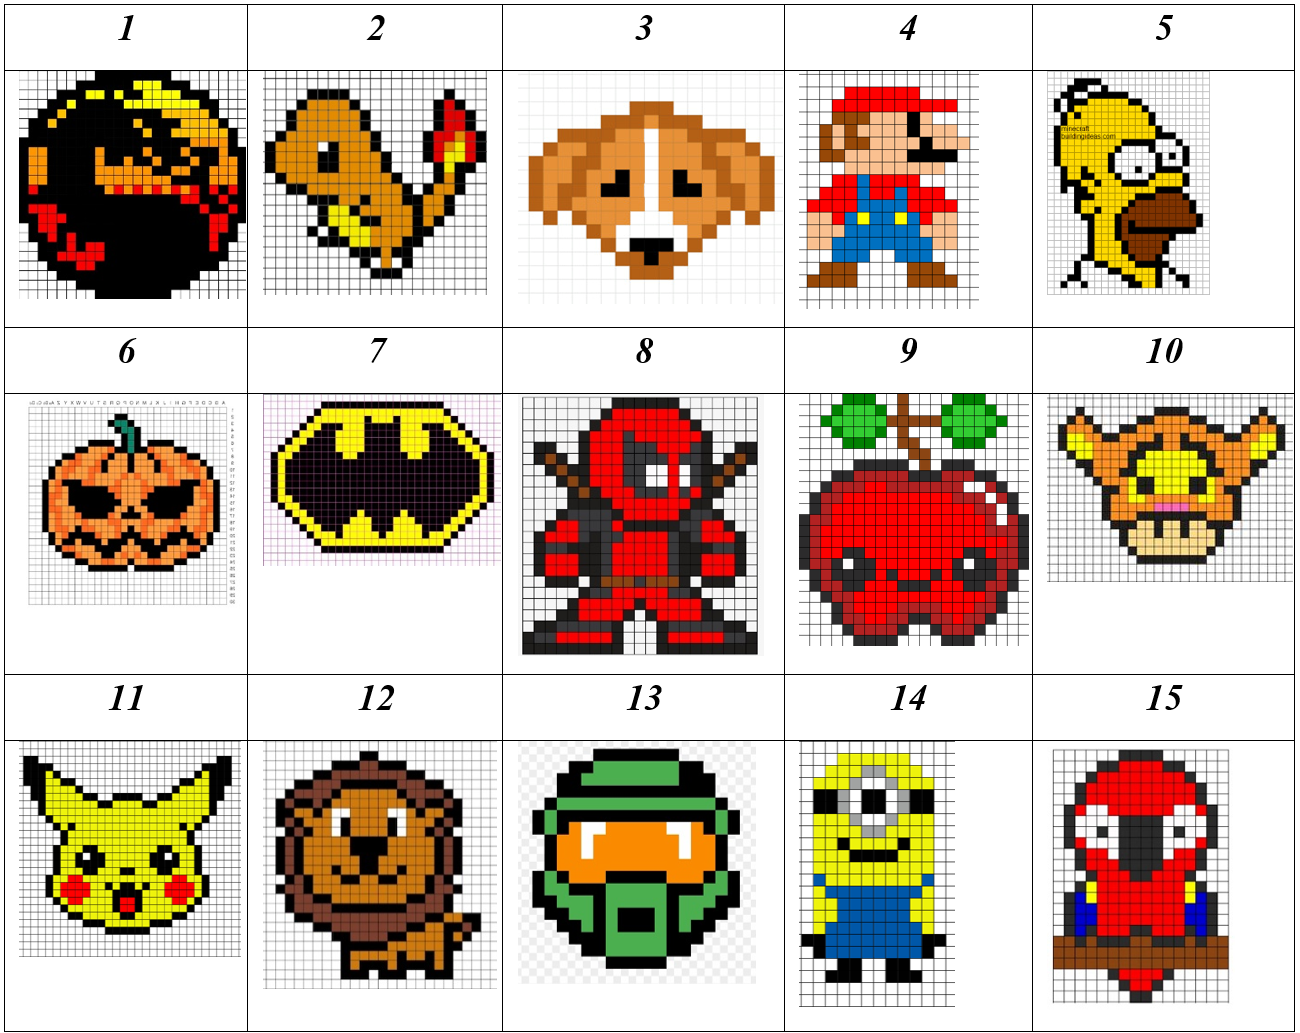

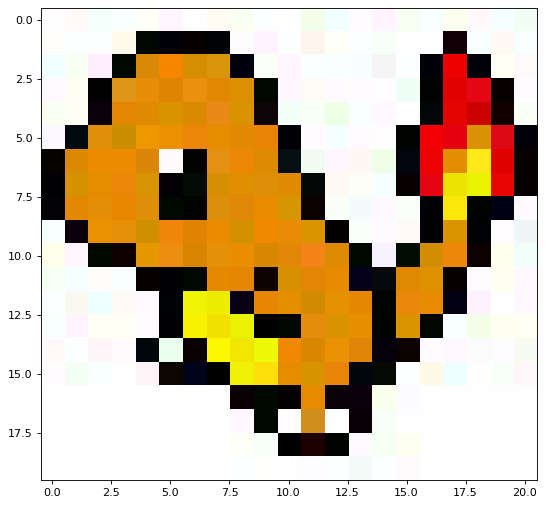

In [9]:
from matplotlib import pyplot as plt
import matplotlib.image as image
import numpy as np

pixels = np.array(
[[[255 ,253 ,254], 
[255 ,249 ,250], 
[242 ,255 ,251], 
[248 ,255 ,254], 
[255 ,255 ,248], 
[255 ,246 ,255], 
[255 ,254 ,255], 
[254 ,251 ,242], 
[251 ,255 ,243], 
[253 ,254 ,255], 
[254 ,254 ,255], 
[243 ,255 ,234], 
[241 ,255 ,255], 
[255 ,251 ,255], 
[255 ,244 ,255], 
[246 ,255 ,242], 
[248 ,255 ,255], 
[252 ,255 ,239], 
[255 ,249 ,251], 
[245 ,255 ,255], 
[242 ,253 ,245], 
], 
[[255 ,254 ,250], 
[251 ,255 ,255], 
[253 ,254 ,255], 
[255 ,250 ,236], 
[0 ,6 ,0], 
[0 ,0 ,8], 
[8 ,0 ,0], 
[0 ,3 ,6], 
[255 ,252 ,253], 
[255 ,243 ,255], 
[252 ,255 ,253], 
[255 ,245 ,236], 
[255 ,255 ,248], 
[251 ,255 ,255], 
[247 ,255 ,249], 
[255 ,254 ,255], 
[254 ,254 ,255], 
[18 ,0 ,6], 
[247 ,255 ,255], 
[255 ,249 ,244], 
[249 ,255 ,255], 
], 
[[242 ,255 ,255], 
[248 ,255 ,243], 
[255 ,238 ,255], 
[0 ,7 ,0], 
[218 ,136 ,8], 
[246 ,134 ,0], 
[212 ,142 ,0], 
[218 ,149 ,10], 
[0 ,1 ,14], 
[252 ,255 ,246], 
[255 ,247 ,255], 
[251 ,255 ,255], 
[247 ,255 ,255], 
[248 ,253 ,255], 
[245 ,245 ,245], 
[254 ,255 ,255], 
[0 ,0 ,9], 
[236 ,0 ,0], 
[0 ,1 ,9], 
[255 ,255 ,244], 
[252 ,251 ,249], 
], 
[[255 ,250 ,255], 
[255 ,253 ,244], 
[0 ,1 ,0], 
[224 ,149 ,22], 
[232 ,141 ,8], 
[222 ,132 ,0], 
[235 ,144 ,14], 
[225 ,135 ,0], 
[220 ,143 ,0], 
[0 ,6 ,0], 
[255 ,247 ,255], 
[252 ,251 ,246], 
[255 ,250 ,255], 
[255 ,252 ,255], 
[255 ,253 ,255], 
[239 ,255 ,247], 
[0 ,2 ,0], 
[224 ,1 ,0], 
[229 ,7 ,20], 
[7 ,0 ,0], 
[255 ,252 ,255], 
], 
[[251 ,255 ,241], 
[255 ,254 ,242], 
[10 ,0 ,11], 
[227 ,135 ,2], 
[223 ,138 ,0], 
[218 ,146 ,0], 
[217 ,138 ,0], 
[233 ,138 ,22], 
[217 ,147 ,0], 
[14 ,5 ,8], 
[242 ,255 ,249], 
[248 ,255 ,244], 
[237 ,255 ,229], 
[249 ,254 ,255], 
[255 ,248 ,255], 
[255 ,254 ,255], 
[0 ,6 ,6], 
[228 ,5 ,0], 
[204 ,2 ,0], 
[17 ,0 ,3], 
[248 ,255 ,245], 
], 
[[251 ,249 ,255], 
[0 ,9 ,16], 
[224 ,143 ,8], 
[202 ,141 ,0], 
[239 ,151 ,0], 
[235 ,145 ,0], 
[237 ,133 ,8], 
[230 ,140 ,0], 
[227 ,137 ,1], 
[234 ,131 ,3], 
[1 ,0 ,5], 
[255 ,251 ,255], 
[245 ,255 ,255], 
[255 ,251 ,255], 
[255 ,253 ,253], 
[0 ,3 ,0], 
[242 ,0 ,6], 
[228 ,0 ,12], 
[217 ,146 ,6], 
[221 ,9 ,21], 
[0 ,2 ,7], 
], 
[[6 ,2 ,0], 
[219 ,137 ,1], 
[237 ,140 ,0], 
[236 ,140 ,2], 
[218 ,134 ,9], 
[255 ,250 ,251], 
[0 ,3 ,0], 
[228 ,144 ,19], 
[236 ,135 ,3], 
[220 ,138 ,2], 
[4 ,15 ,19], 
[241 ,251 ,242], 
[255 ,246 ,255], 
[255 ,247 ,243], 
[239 ,254 ,233], 
[3 ,6 ,15], 
[236 ,3 ,0], 
[227 ,142 ,0], 
[255 ,232 ,25], 
[224 ,0 ,0], 
[8 ,0 ,0], 
], 
[[1 ,0 ,4], 
[212 ,146 ,0], 
[229 ,139 ,0], 
[236 ,134 ,8], 
[216 ,148 ,3], 
[3 ,0 ,4], 
[2 ,11 ,6], 
[215 ,142 ,0], 
[223 ,142 ,0], 
[221 ,143 ,7], 
[223 ,138 ,0], 
[5 ,7 ,6], 
[255 ,249 ,244], 
[253 ,255 ,247], 
[245 ,255 ,255], 
[6 ,0 ,0], 
[228 ,4 ,15], 
[235 ,227 ,4], 
[234 ,242 ,0], 
[231 ,6 ,2], 
[7 ,0 ,0], 
], 
[[3 ,2 ,7], 
[226 ,135 ,0], 
[229 ,141 ,5], 
[232 ,136 ,0], 
[223 ,142 ,7], 
[0 ,6 ,0], 
[0 ,4 ,0], 
[220 ,143 ,13], 
[224 ,135 ,9], 
[233 ,140 ,1], 
[214 ,149 ,3], 
[11 ,0 ,2], 
[249 ,255 ,248], 
[243 ,252 ,251], 
[255 ,249 ,255], 
[250 ,255 ,250], 
[0 ,0 ,5], 
[251 ,231 ,10], 
[0 ,4 ,0], 
[0 ,0 ,20], 
[255 ,250 ,255], 
], 
[[247 ,255 ,255], 
[10 ,0 ,11], 
[233 ,145 ,0], 
[231 ,143 ,7], 
[208 ,143 ,0], 
[239 ,134 ,9], 
[225 ,132 ,1], 
[234 ,139 ,0], 
[211 ,145 ,0], 
[240 ,137 ,0], 
[233 ,139 ,5], 
[220 ,147 ,0], 
[3 ,0 ,0], 
[249 ,255 ,250], 
[255 ,250 ,255], 
[255 ,250 ,247], 
[2 ,2 ,4], 
[219 ,147 ,0], 
[0 ,2 ,3], 
[255 ,253 ,255], 
[238 ,246 ,248], 
], 
[[255 ,255 ,234], 
[255 ,246 ,255], 
[0 ,8 ,0], 
[14 ,0 ,0], 
[230 ,152 ,0], 
[235 ,141 ,17], 
[215 ,133 ,0], 
[228 ,145 ,7], 
[233 ,142 ,0], 
[215 ,135 ,0], 
[227 ,135 ,8], 
[243 ,132 ,24], 
[221 ,139 ,1], 
[0 ,7 ,0], 
[247 ,242 ,255], 
[0 ,13 ,0], 
[211 ,141 ,0], 
[237 ,135 ,9], 
[13 ,0 ,0], 
[255 ,255 ,239], 
[241 ,255 ,250], 
], 
[[246 ,255 ,243], 
[245 ,255 ,255], 
[255 ,253 ,251], 
[249 ,255 ,255], 
[7 ,0 ,0], 
[1 ,0 ,2], 
[0 ,7 ,0], 
[229 ,137 ,0], 
[228 ,135 ,0], 
[14 ,2 ,4], 
[215 ,145 ,0], 
[227 ,134 ,5], 
[230 ,139 ,0], 
[4 ,0 ,28], 
[7 ,8 ,12], 
[224 ,137 ,0], 
[222 ,146 ,0], 
[7 ,0 ,1], 
[255 ,252 ,255], 
[255 ,255 ,241], 
[255 ,249 ,255], 
], 
[[251 ,255 ,253], 
[249 ,249 ,239], 
[238 ,255 ,255], 
[255 ,250 ,244], 
[255 ,250 ,255], 
[0 ,2 ,3], 
[239 ,243 ,6], 
[238 ,236 ,1], 
[7 ,0 ,19], 
[231 ,134 ,3], 
[229 ,143 ,0], 
[210 ,139 ,0], 
[230 ,146 ,0], 
[230 ,135 ,0], 
[0 ,2 ,0], 
[233 ,135 ,12], 
[231 ,139 ,0], 
[3 ,0 ,17], 
[253 ,241 ,253], 
[255 ,254 ,255], 
[255 ,249 ,255], 
], 
[[249 ,254 ,255], 
[255 ,244 ,255], 
[255 ,255 ,246], 
[255 ,255 ,243], 
[255 ,252 ,255], 
[1 ,0 ,2], 
[248 ,242 ,0], 
[242 ,225 ,0], 
[233 ,242 ,1], 
[0 ,0 ,0], 
[0 ,6 ,0], 
[229 ,140 ,12], 
[219 ,146 ,0], 
[232 ,143 ,0], 
[0 ,3 ,0], 
[218 ,148 ,1], 
[0 ,6 ,0], 
[247 ,255 ,255], 
[244 ,255 ,232], 
[255 ,255 ,241], 
[255 ,255 ,244], 
], 
[[255 ,249 ,250], 
[252 ,255 ,255], 
[255 ,246 ,249], 
[255 ,251 ,252], 
[0 ,7 ,11], 
[233 ,255 ,236], 
[10 ,0 ,2], 
[252 ,247 ,0], 
[240 ,230 ,0], 
[238 ,249 ,7], 
[241 ,137 ,4], 
[218 ,135 ,0], 
[235 ,145 ,5], 
[225 ,133 ,8], 
[5 ,0 ,13], 
[13 ,0 ,0], 
[255 ,252 ,255], 
[255 ,248 ,255], 
[251 ,251 ,251], 
[253 ,253 ,255], 
[248 ,251 ,242], 
], 
[[255 ,252 ,255], 
[243 ,255 ,245], 
[248 ,255 ,255], 
[254 ,254 ,255], 
[255 ,245 ,249], 
[12 ,5 ,0], 
[0 ,3 ,25], 
[1 ,0 ,0], 
[241 ,241 ,7], 
[254 ,223 ,11], 
[229 ,139 ,0], 
[216 ,147 ,0], 
[235 ,133 ,9], 
[0 ,5 ,11], 
[6 ,8 ,3], 
[251 ,255 ,255], 
[255 ,249 ,232], 
[238 ,255 ,255], 
[255 ,253 ,254], 
[248 ,255 ,248], 
[255 ,247 ,250], 
], 
[[255 ,255 ,255], 
[255 ,255 ,255], 
[255 ,255 ,255], 
[255 ,255 ,255], 
[255 ,255 ,255], 
[255 ,255 ,255], 
[255 ,255 ,255], 
[255 ,255 ,255], 
[10 ,0 ,4], 
[0 ,8 ,0], 
[4 ,0 ,0], 
[230 ,139 ,0], 
[11 ,1 ,9], 
[10 ,0 ,9], 
[249 ,255 ,234], 
[251 ,250 ,255], 
[254 ,254 ,254], 
[254 ,254 ,254], 
[254 ,254 ,254], 
[254 ,254 ,254], 
[254 ,254 ,254], 
], 
[[255 ,255 ,255], 
[255 ,255 ,255], 
[255 ,255 ,255], 
[255 ,255 ,255], 
[255 ,255 ,255], 
[255 ,255 ,255], 
[255 ,255 ,255], 
[255 ,255 ,255], 
[255 ,249 ,255], 
[0 ,7 ,0], 
[255 ,253 ,255], 
[208 ,142 ,29], 
[255 ,254 ,255], 
[7 ,1 ,5], 
[245 ,255 ,247], 
[255 ,254 ,255], 
[254 ,254 ,254], 
[254 ,254 ,254], 
[254 ,254 ,254], 
[254 ,254 ,254], 
[254 ,254 ,254], 
], 
[[255 ,255 ,255], 
[255 ,255 ,255], 
[255 ,255 ,255], 
[255 ,255 ,255], 
[255 ,255 ,255], 
[255 ,255 ,255], 
[255 ,255 ,255], 
[255 ,255 ,255], 
[254 ,255 ,246], 
[248 ,255 ,250], 
[1 ,0 ,0], 
[29 ,0 ,0], 
[0 ,2 ,0], 
[254 ,251 ,255], 
[246 ,255 ,241], 
[253 ,255 ,241], 
[254 ,254 ,254], 
[254 ,254 ,254], 
[254 ,254 ,254], 
[254 ,254 ,254], 
[254 ,254 ,254], 
], 
[[255 ,255 ,255], 
[255 ,255 ,255], 
[255 ,255 ,255], 
[255 ,255 ,255], 
[255 ,255 ,255], 
[255 ,255 ,255], 
[255 ,255 ,255], 
[255 ,255 ,255], 
[251 ,255 ,255], 
[254 ,254 ,252], 
[255 ,254 ,255], 
[253 ,252 ,255], 
[252 ,255 ,253], 
[245 ,251 ,249], 
[254 ,255 ,255], 
[253 ,251 ,252], 
[255 ,255 ,255], 
[255 ,255 ,255], 
[255 ,255 ,255], 
[254 ,254 ,254], 
[254 ,254 ,254], 
]]
)

plt.figure(num=None, figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(pixels)
plt.show()

### 2.2. Створіть подібне зображення на основі програмно згенерованого NumPy-масиву. Наприклад, можете взяти розмір квадратиків 8х8 пікселів
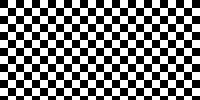

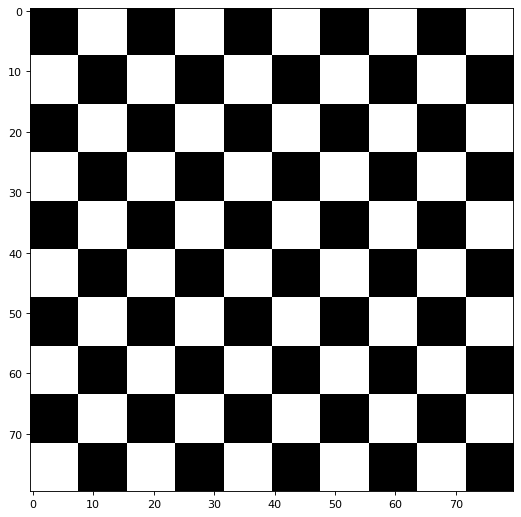

In [10]:
img = np.array([[([0, 0, 0] if (i // 8 + j // 8) % 2 == 0 else [255, 255, 255]) for j in range(8*10)] for i in range(8*10)])

plt.figure(num=None, figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(img)
plt.show()

### 2.3. Зімітуйте подібну поломку екрану для довільного кольорового зображення.
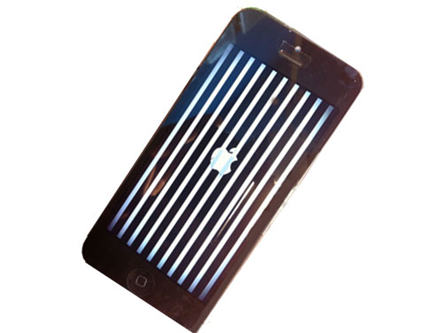


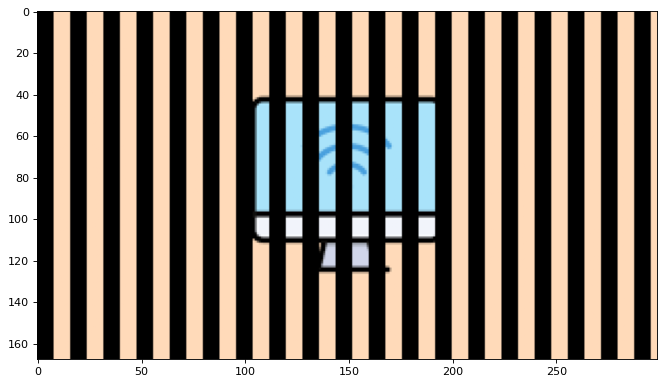

In [11]:
img = image.imread("img.png")

for i in range(len(img)):
    for j in range(len(img[1])):
        if (j // 8) % 2 == 0:
            img[i][j] = [0., 0., 0., 1]

plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(img)
plt.show()

### 2.4. Створіть RGBA-зображення з градієнтним кольором, на зразок таких:
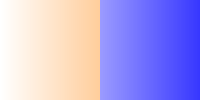
#### Градієнтність кольору задається каналом прозорості (значення від 0 до 255), тому слід намагатись рівномірно збільшувати значення каналу прозорості по стовпцях матриці зображення з однотонним значенням кольору

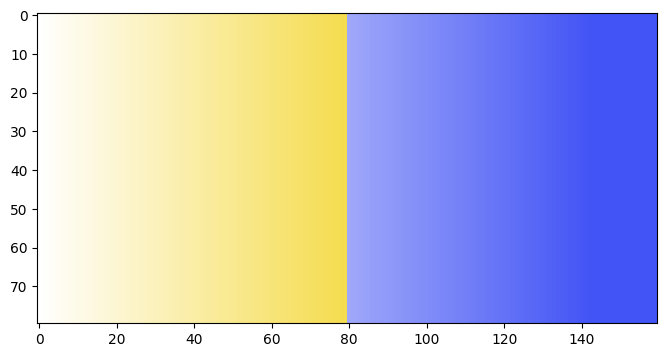

In [12]:
from matplotlib import pyplot as plt

img1 = np.array([[
    ([245, 218, 66, int(3*j)]) for j in range(8*10)] for i in range(8*10)])
img2 = np.array([[
    ([66, 84, 245, int(2*j+130) if int(2*j+130) < 255 else 255])
    for j in range(8*10)] 
    for i in range(8*10)])

finalImg = np.hstack((img1[:, :], img2[:, :]))

plt.figure(num=None, figsize=(8, 16), dpi=100, facecolor='w', edgecolor='k')
plt.imshow(finalImg)
plt.show()


### 2.5. Порівняння 2 зображень за допомогою NumPy-операцій

#### Завантажте [зображення 1](https://csbc-edu.github.io/programming-essentials/materials/sushi1.png) та [зображення 2](https://csbc-edu.github.io/programming-essentials/materials/sushi2.png). 


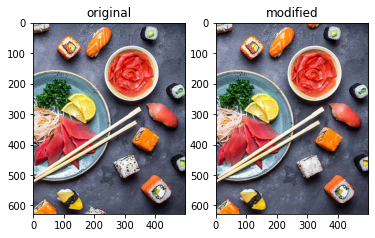

In [13]:
import matplotlib.image as image
import matplotlib.pyplot as plt
import numpy as np

imgWithAlpha1 = image.imread('sushi1.png')
imgWithAlpha2 = image.imread('sushi2.png')

fig, ax = plt.subplots(1, 2)

ax[0].set_title("original")
ax[1].set_title("modified")

ax[0].imshow(imgWithAlpha1)
ax[1].imshow(imgWithAlpha2)

#### Першим кроком для знаходження відмінностей стає [усунення альфа-каналу із зображень](http://vda.univie.ac.at/Teaching/SIP/19s/Tutorial/image_processing.html) (залишаємо тільки RGB значення в масиві). 

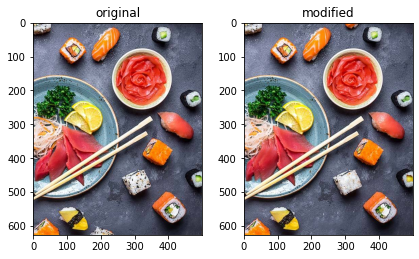

In [14]:
fig, ax = plt.subplots(1, 2)
fig.tight_layout()

ax[0].set_title("original")
ax[1].set_title("modified")

img1 = imgWithAlpha1[:, :, :3]
img2 = imgWithAlpha2[:, :, :3]

ax[0].imshow(img1)
ax[1].imshow(img2)

#### Далі швидко знебарвіть зображення, виконуючи усереднення по RGB каналах за допомогою функції numpy.mean(). Зверніть увагу, що зображення є двовимірним об’єктом, тому також потрібно задати параметр axis. Отримавши чорно-білі зображення, знайдіть їх різницю та виведіть на екран її зображення.

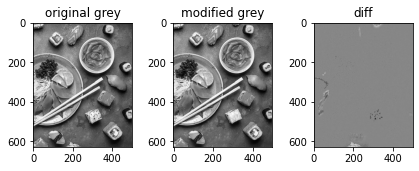

In [15]:
fig, ax = plt.subplots(1, 3)
fig.tight_layout()

ax[0].set_title("original grey")
ax[1].set_title("modified grey")
ax[2].set_title("diff")

imgMean1 = np.mean(img1, axis=2)
imgMean2 = np.mean(img2, axis=2)
diff = imgMean1 - imgMean2

plt.gray()
ax[0].imshow(imgMean1)
ax[1].imshow(imgMean2)
ax[2].imshow(diff)

#### Уже з’явились перші контури об’єктів, що відрізняються на вище згаданих зображеннях. Проте варто зауважити, що різниця між пікселями може призвести до появи від’ємних значень. Виведіть мінімальне та максимальне значення пікселя для даного зображення та помітите це. Для відображення всіх значень у проміжок [0; 1] піднесемо їх усі до квадрату. 

-0.9189543 0.82745105


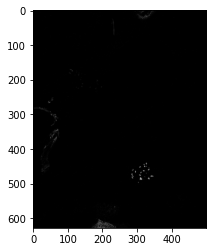

In [16]:
diffMax = diff.max()
diffMin = diff.min()

print(diffMin, diffMax)

diffSquare = diff**2
plt.imshow(diffSquare)

#### Яскравіше виділити області зображень, які відрізняються, можна за рахунок додавання порогового значення, яке відкине всі близькі до 0 значення пікселів. Наприклад, візьмемо поріг 0.05 (5%). Тоді пікселі, значення яких відрізняються для двох зображень більш суттєво, стануть білими (True), а менше порогу – стануть чорними (False)

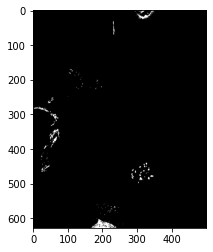

In [17]:
diffThresholded = diffSquare > 0.05

plt.imshow(diffThresholded)

#### Наступний крок – позначити відмінності власне на зображеннях. Для цього потрібно нанести додатковий прошарок на початкове зображення, зробивши його, по суті, тривимірним. Цього можна добитись, наприклад, застосувавши функцію numpy.reshape() (розміри по х та у залишаються, проте з’явиться третій вимір - np.reshape(зображення, (x-розмір, y-розмір, 1)). 

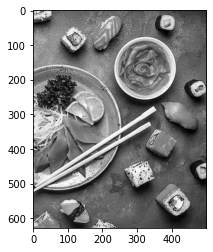

In [18]:
xSize, ySize = imgMean1.shape
img3d1 = np.reshape(imgMean1, (xSize, ySize, 1))

plt.imshow(img3d1)

#### Далі потрібно буде накласти отриману на останньому зображенні маску на кожний канал зображення. В цьому допоможе функція numpy.tile():
різницяRGB = np.tile(3d-зображення, (1, 1, 3))

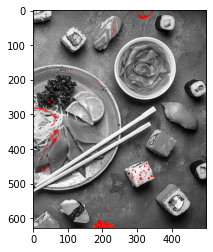

In [19]:
diffRGB = np.tile(img3d1, (1, 1, 3))
diffRGB[diffThresholded, :] = [1, 0,  0]

plt.imshow(diffRGB)

#### Побудуйте отриманий результат разом із початковими зображеннями суші. 

#### Якщо розміри візуалізації не задовольняють, можете задати їх при побудові підграфіків, наприклад, plt.subplots(1, 3, figsize=(20, 7))

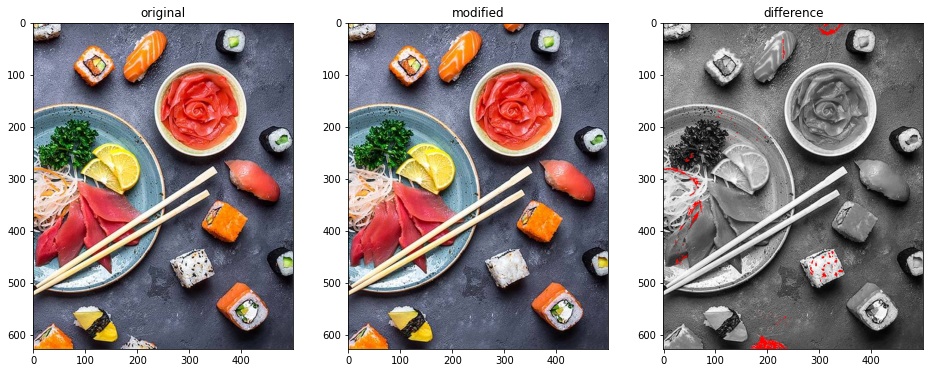

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6))

ax[0].set_title("original")
ax[1].set_title("modified")
ax[2].set_title("difference")

ax[0].imshow(imgWithAlpha1)
ax[1].imshow(imgWithAlpha2)
ax[2].imshow(diffRGB)

### 2.6. Пройдіть [туторіал](https://www.geeksforgeeks.org/image-processing-with-scipy-and-numpy-in-python/). Занесіть відповідний код і пояснення нижче.

#### Відкриваємо та записуємо зображення

(316, 316, 3)


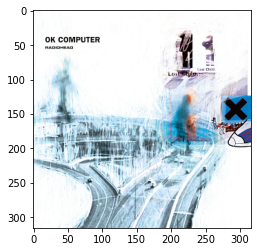

In [21]:
from scipy import misc, ndimage
import matplotlib.image as image
import matplotlib.pyplot as plt
import numpy as np
  
img = image.imread('computer.png')
img = img[:, :, :3]

print(img.shape)  
plt.imshow(img)


#### Створюємо RAW-файл

In [22]:
img.tofile("computer.raw")

#### Отримуємо статистичну інформацію

In [23]:
print(img.max())
print(img.min())
print(img.mean())

1.0
0.0
0.8599447


#### Обрізаємо зображення

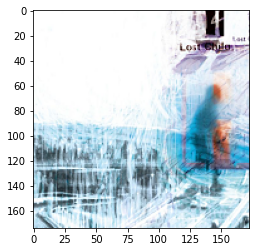

In [24]:
x = img.shape[0]
y = img.shape[1]

crop = img[x//5: - x//4, y//4: - y//5]

plt.imshow(crop)

#### Перевертаємо зображення

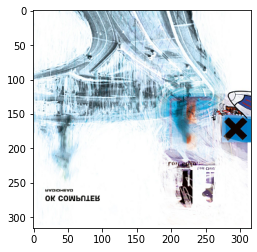

In [25]:
imgFlip = np.flipud(img)

plt.imshow(imgFlip)

#### Повертаємо зображення

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


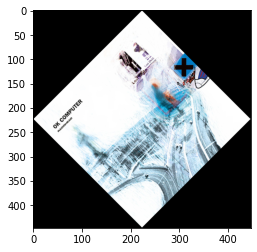

In [26]:
imgRotate = ndimage.rotate(img, 45)

plt.imshow(imgRotate)

#Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). 
#Не знаю, до чого ця помилка, але вона у мене випадає

#### Фільтруємо зображення

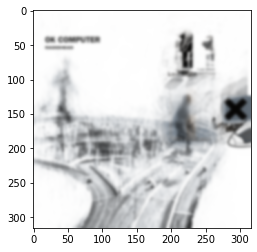

In [27]:
imgBlur = ndimage.gaussian_filter(img,sigma=2)
#коли більше 2, мило повне

plt.imshow(imgBlur)

#### Підвищуємо різкість зображення

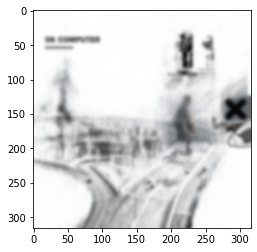

In [28]:
imgSharp = ndimage.gaussian_filter(imgBlur, 1)

alpha = 120
sharp = imgBlur+alpha*(imgBlur-imgSharp)

plt.imshow(imgSharp)

#### Знижуємо зашумленість зображення

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


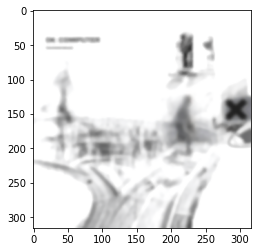

In [29]:
imgStrange = img[40:100,30:100]
  
imgNoise = img+0.9*img.std()*np.random.random(img.shape)
  
imgDenoised = ndimage.gaussian_filter(imgNoise, 2.2)

imgDenoised = ndimage.median_filter(imgDenoised, 4)
#Вирішив два рази знизити зашумленість, результат супер

plt.imshow(imgDenoised)

#### Визначаємо контури

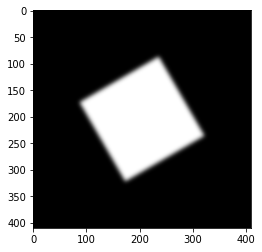

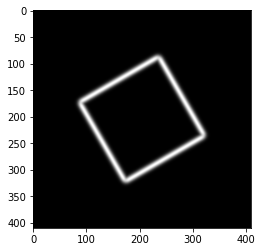

In [30]:
imgSquare = np.zeros((300, 300))
imgSquare[64:-64, 64:-64] = 1
imgSquare = ndimage.rotate(imgSquare, 30, mode='constant')
imgSquare = ndimage.gaussian_filter(imgSquare, 4)
  
plt.imshow(imgSquare)
plt.show()
  
x = ndimage.sobel(imgSquare, axis=0, mode='constant')
y = ndimage.sobel(imgSquare, axis=1, mode='constant')
borders = np.hypot(x, y)

plt.imshow(borders)

# 
## 3. Перевірка гіпотез за допомогою пакетів scipy.stats та statsmodels (1 бал)
#### Пройдіть [туторіал](https://towardsdatascience.com/hypothesis-testing-in-data-science-875e9d24785e). Занесіть відповідний код і пояснення (замість ...) нижче.

### Вступ до статті
#### У статті розглядаються етапи перевірки гіпотез, визначаються ключова термінологія та демонструються приклади різних типів перевірок гіпотез (hypothesis tests).

Існує п’ять основних кроків для перевірки статистичної гіпотези:

1. Поставте нульову та альтернативну гіпотезу
2. Виберіть рівень значимості α
3. Визначте критичне статистичне значення тесту або p-значення
4. Обчисліть значення тестової статистики
5. Порівняйте значення тестової статистики з критичним значенням статистики тесту

Давайте розберемо їх і визначимо ключову термінологію.

1. Поставте нульову та альтернативну гіпотезу
Нульова гіпотеза: можемо розглядати як «контроль» експерименту. Гіпотеза вважається істинною до того, як ми збираємо дані, і ,зазвичай, має якийсь знак рівності (≥, ≤, =).
Альтернативна гіпотеза: можемо розглядати як «експеримент». Це те, що ми хочемо підтвердити за допомогою наших зібраних даних і зазвичай має знак, протилежний нульовій гіпотезі.
2. Виберіть рівень значимості α
Рівень значущості α — це поріг, при якому ви можемо відкидати нульову гіпотезу. Якщо менше порогу - похибка, якщо більше - факт.
3. Визначити критичне значення
Критичне значення — це значення розподілу тесту порівняно зі статистикою тесту, щоб визначити, чи слід відхиляти нульову гіпотезу.
4. Обчисліть тестову статистику або p-значення
Тестова статистика — це значення, розраховане на основі наданих даних, а потім порівняне з критичним значенням, щоб визначити, чи слід відхиляти нульову гіпотезу.
Значення p — це ймовірність спостереження за тестовою статистикою, принаймні такої ж великої, як і спостережувана, випадково, якщо нульова гіпотеза вірна.
Як ми знаємо, який тип тестової статистики розрахувати? Це залежить від того, який тип перевірки гіпотези ми проводимо. Існує чотири типи: z-тест, t-тест, ANOVA та хі-квадрат. Z-тест використовується, коли порівнюють середні сукупності та коли відоме стандартне відхилення сукупності. Для невідомих середніх популяційних показників і стандартного відхилення сукупності використовується t-критерій. ANOVA використовується під час порівняння вибіркових середніх серед трьох або більше груп. Нарешті, тест хі-квадрат — це непараметричний тест, який використовується для перевірки зв’язків між категоріальними змінними.
5. Порівняйте значення тестової статистики з критичним значенням тестової статистики або p-значення з рівнем значущості, щоб визначити, відкидати нульову гіпотезу чи ні.
Якщо тестова статистика перевищує критичне значення, ми відхиляємо нульову гіпотезу. Якщо тестова статистика менше або дорівнює критичному значенню, ми не можемо відхилити нульову гіпотезу.
Якщо p < α, ми відхиляємо нульову гіпотезу. Якщо p ≥ α, ми не можемо відхилити нульову гіпотезу.
І ось у вас є п’ять кроків для проведення перевірки гіпотези, тож давайте тепер проведемо перевірку гіпотези на Python за допомогою SciPy.

### t-тест
#### Наприклад, застосуємо [датасет](https://www.kaggle.com/fabdelja/autism-screening-for-toddlers) з Kaggle, який містить анкетні відповіді, щоб визначити, чи має дитина ознаки розладу аутистичного спектру (Autism Spectrum Disorder, ASD). Імпортуємо необхідні бібліотеки та csv-файл:

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats    
from scipy.stats import chi2_contingency
from scipy.stats import chi2
df = pd.read_csv('Toddler Autism dataset July 2018.csv')

#### Першою статистичною перевіркою для проведення буде t-критерій Стьюдента для незалежних вибірок (independent samples t-test), у якому ми порівнюємо середні значення 2 груп із залежною величиною. Для нашого прикладу використаємо [рівень значимості](http://www.machinelearning.ru/wiki/index.php?title=%D0%A3%D1%80%D0%BE%D0%B2%D0%B5%D0%BD%D1%8C_%D0%B7%D0%BD%D0%B0%D1%87%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D0%B8) 0.05 та будемо розглядати залежність між стовпцями sex (стать) та qchat_score (загальна оцінка з анкети для визначення ознак ASD). Визначимо нульову та альтернативну гіпотези.

Нульова гіпотеза: немає статистичної різниці між середніми балами qchat для чоловіків і жінок.

Альтернативна гіпотеза: існує статистична різниця між середніми балами qchat для чоловіків і жінок.

#### Далі необхідно відокремити стать на 2 датафрейми (для хлопців та для дівчат):

In [32]:
male_df = df.loc[(df['Sex'] == 'm')]
female_df = df.loc[(df['Sex']== 'f')]

#### Тепер можемо застосувати бібліотеку SciPy з відкритим первинним кодом, щоб обчислити статистику тесту та p-значення.

In [33]:
print(stats.ttest_ind(male_df['Qchat-10-Score'], female_df['Qchat-10-Score'], equal_var=False))
df.groupby('Sex').describe()

Ttest_indResult(statistic=3.5533775067196403, pvalue=0.00041253433588685375)


Case_No                                                               A1  \
      count        mean         std  min    25%    50%    75%     max  count   
Sex                                                                            
f     319.0  496.579937  314.997613  1.0  196.5  513.0  772.0  1050.0  319.0   
m     735.0  540.919728  298.919376  2.0  288.5  537.0  801.5  1054.0  735.0   

               ... Age_Mons       Qchat-10-Score                           \
         mean  ...      75%   max          count      mean       std  min   
Sex            ...                                                          
f    0.479624  ...     35.0  36.0          319.0  4.714734  3.075078  0.0   
m    0.600000  ...     36.0  36.0          735.0  5.428571  2.806182  0.0   

                          
     25%  50%  75%   max  
Sex                       
f    2.0  5.0  7.0  10.0  
m    3.0  5.0  8.0  10.0  

[2 rows x 104 columns]

#### Як можна бачити, оскільки p-значення перевищує рівень значимості (0.05), нам не вдається відкинути нульову гіпотезу. 

При подальшому огляді ми бачимо, що у вибірці більше чоловіків, ніж жінок, тому, можливо, нам не вдалося виявити суттєву різницю. Ми також могли б використати нашу статистику тесту та порівняти її з нашим критичним значенням, щоб визначити, чи слід відхиляти нульову гіпотезу.

### ANOVA-тест
#### Перевірка ANOVA здійснюється при порівнянні 3 або більше груп із залежною величиною. У нашому прикладі будемо порівнювати ознаку Ethnicity з qchat_score.

Нульова гіпотеза: немає статистично значущої різниці середніх балів qchat між групами етнічної приналежності.

Альтернативна гіпотеза: існує статистично значуща різниця середніх балів qchat між групами етнічної приналежності.

In [34]:
# CALCULATE TEST STATISTIC AND PVALUE
print(stats.f_oneway(df['Qchat-10-Score'][df['Ethnicity'] == 'White European'],
                df['Qchat-10-Score'][df['Ethnicity'] == 'asian'], 
                df['Qchat-10-Score'][df['Ethnicity'] == 'middle eastern'],
               df['Qchat-10-Score'][df['Ethnicity'] == 'south asian'],
               df['Qchat-10-Score'][df['Ethnicity'] == 'black'],
               df['Qchat-10-Score'][df['Ethnicity'] == 'Hispanic'],
               df['Qchat-10-Score'][df['Ethnicity'] == 'Others'],
               df['Qchat-10-Score'][df['Ethnicity'] == 'Latino'],
               df['Qchat-10-Score'][df['Ethnicity'] == 'mixed'],
               df['Qchat-10-Score'][df['Ethnicity'] == 'Pacifica'],
               df['Qchat-10-Score'][df['Ethnicity'] == 'Native Indian']))

F_onewayResult(statistic=4.238502726003112, pvalue=8.460894846474487e-06)


#### Як ви можете бачити, оскільки p-значення менше за рівень значимості, ми відкидаємо нульову гіпотезу: існує статистично значима різниця середніх значень qchat_scores між етнічними групами. Як нам визначити, в чому полягають відмінності в контексті етнічної групи? Для цього слід провести post-hoc аналіз.

Використовуючи statsmodels, який надає класи та функції для оцінки багатьох різних статистичних моделей, ми проведемо Tukey’s HSD для post-hoc аналізу.

In [35]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df['Qchat-10-Score'], df['Ethnicity'])
mc_results = mc.tukeyhsd()
print(mc_results)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
      Hispanic         Latino   0.3231    1.0  -2.004  2.6502  False
      Hispanic  Native Indian      1.4 0.9992 -4.1297  6.9297  False
      Hispanic         Others   0.0286    1.0 -2.1095  2.1667  False
      Hispanic       Pacifica      1.4 0.9747 -2.1777  4.9777  False
      Hispanic White European   0.1156    1.0   -1.43  1.6611  False
      Hispanic          asian  -0.6167 0.9722 -2.1719  0.9385  False
      Hispanic          black    0.117    1.0 -1.8178  2.0518  False
      Hispanic middle eastern   -1.334 0.2125 -2.9425  0.2744  False
      Hispanic          mixed   -0.975 0.9986 -4.5527  2.6027  False
      Hispanic    south asian  -0.5833 0.9958 -2.4689  1.3023  False
        Latino  Native Indian   1.0769 0.9999 -4.5557  6.7095  False
        Latino         Others  -0.

#### Як бачимо з виводу, відмінності знаходяться для груп  White European та Asian. 

### $\chi^2$-аналіз
#### Нарешті, виконаємо $\chi^2$-аналіз поточних даних. Він застосовується для порівняння 2 категорійних величин.

Нульова гіпотеза: немає жодного зв’язку між статтю та етнічною приналежністю людей з ознаками ASD.

Альтернатива: існує зв’язок між статтю та етнічною приналежністю людей з ознаками ASD.

In [36]:
df_both = df.groupby('Sex').Ethnicity.value_counts()
df_new = df_both.unstack()
values = {'Native Indian': 0}
df_new.fillna(value=values,inplace=True)

#### Чудово! Тепер можемо провести наш $\chi^2$-аналіз.

In [37]:
stat, p, dof, expected = chi2_contingency(df_both)
print(expected)

#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

[ 94.  80.  69.  20.  16.  13.  11.   9.   4.   3. 240. 230. 108.  40.
  37.  31.  22.  15.   5.   4.   3.]
probability=0.950, critical=nan, stat=0.000)
Independent (fail to reject H0)
signigicance=0.050, p=1.000,
Independent (fail to reject)


#### З отриманих результатів нам не вдалось відкинути нашу нульову гіпотезу, немає зв'язку між величинами Sex та Ethnicity в контексті ознак ASD.

# Дякуємо, що прочитали